**Корректность проверена на Python 3.7:**
+ numpy 1.14.5

# Доверительные интервалы для доли 

## Генерация данных

In [ ]:
import numpy as np
%pylab inline


Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['random_sample']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [ ]:
print(np.__version__)

1.19.5


In [ ]:
np.random.seed(1)

statistical_population = np.random.randint(2, size = 100000) 

random_sample = np.random.choice(statistical_population, size = 1000)

In [ ]:
np.unique(statistical_population)

array([0, 1])

In [ ]:
#истинное значение доли
statistical_population.mean()

0.49771

## Точечная оценка доли

In [ ]:
random_sample.mean()

0.502

## Доверительный интервал для доли

In [ ]:
from statsmodels.stats.proportion import proportion_confint

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Доверительный интервал на основе нормального распределения

$$\hat{p}\pm z_{1-\frac{\alpha}{2}} \sqrt{\frac{\hat{p}\left(1-\hat{p}\right)}{n}}$$

In [ ]:
normal_interval = proportion_confint(sum(random_sample), len(random_sample), method = 'normal')

In [ ]:
print('normal_interval [%f, %f] with width %f' % (normal_interval[0],
                                                  normal_interval[1], 
                                                  normal_interval[1] - normal_interval[0]))

normal_interval [0.471010, 0.532990] with width 0.061979


In [ ]:
ci = proportion_confint(1, 50, method='wilson')
print(ci)
p = 1 / 50
delta = ci[1] - p
print(p - delta)

(0.003539259271646236, 0.10495443589637815)
-0.06495443589637814


In [ ]:

p = 1 / 50
n = 50
delta = 1.96 * (p * (1 - p) / n) ** 0.5
print(p - delta)

-0.018806020151517725


### Доверительный интервал Уилсона

$$\frac1{ 1 + \frac{z^2}{n} } \left( \hat{p} + \frac{z^2}{2n} \pm z \sqrt{ \frac{ \hat{p}\left(1-\hat{p}\right)}{n} + \frac{
z^2}{4n^2} } \right), \;\; z \equiv z_{1-\frac{\alpha}{2}}$$ 

In [ ]:
wilson_interval = proportion_confint(sum(random_sample), len(random_sample), method = 'wilson')

In [ ]:
print('wilson_interval [%f, %f] with width %f' % (wilson_interval[0],
                                                  wilson_interval[1],
                                                  wilson_interval[1] - wilson_interval[0]))

wilson_interval [0.471062, 0.532922] with width 0.061860


## Размер выборки для интервала заданной ширины

In [ ]:
from statsmodels.stats.proportion import samplesize_confint_proportion

In [ ]:
n_samples = int(np.ceil(samplesize_confint_proportion(random_sample.mean(), 0.01)))
n_samples

9604

In [ ]:
random_sample.mean()

0.49177426072469804

In [ ]:
help(samplesize_confint_proportion)

Help on function samplesize_confint_proportion in module statsmodels.stats.proportion:

samplesize_confint_proportion(proportion, half_length, alpha=0.05, method='normal')
    find sample size to get desired confidence interval length
    
    Parameters
    ----------
    proportion : float in (0, 1)
        proportion or quantile
    half_length : float in (0, 1)
        desired half length of the confidence interval
    alpha : float in (0, 1)
        significance level, default 0.05,
        coverage of the two-sided interval is (approximately) ``1 - alpha``
    method : string in ['normal']
        method to use for confidence interval,
        currently only normal approximation
    
    Returns
    -------
    n : float
        sample size to get the desired half length of the confidence interval
    
    Notes
    -----
    this is mainly to store the formula.
    possible application: number of replications in bootstrap samples



In [ ]:
np.random.seed(1)
random_sample = np.random.choice(statistical_population, size = n_samples)

In [ ]:
normal_interval = proportion_confint(sum(random_sample), len(random_sample), method = 'normal')

In [ ]:
print('normal_interval [%f, %f] with width %f' % (normal_interval[0],
                                                  normal_interval[1],
                                                  normal_interval[1] - normal_interval[0]))

normal_interval [0.481776, 0.501773] with width 0.019997


In [ ]:
p = np.linspace(0, 1, 101, endpoint=True)
# n_samples = 
n_samples = np.ceil(samplesize_confint_proportion(p, 0.01)).astype(int)

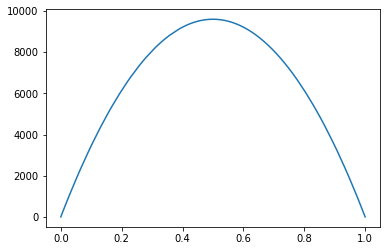

In [ ]:
pyplot.plot(p, n_samples)

In [ ]:
points = list(zip(p, n_samples))
# print(list(points)[:4])
mp = max(points, key=lambda x: x[1])
mp

(0.5, 9604)

In [8]:
from scipy.stats import norm
alpha = (1 - 0.997) / 2
print(alpha)
print(norm.ppf(alpha))
print(norm.cdf(3))

0.0015000000000000013
-2.9677379253417833
0.9986501019683699
